In [12]:
import numpy as np # linear algebra
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [18]:
traffic_data = pd.read_csv('cleaned_road_counts.csv', parse_dates=True)

In [19]:
traffic_data.head()

,Unnamed: 0,ROAD_ID,TIMESTAMP,ROAD_CLASS,NUMBER_VEHICLES
0,0,A3112-52-E-1.1,2019-09-06 17:00:00,Major,25.0
1,1,A3112-52-E-1.1,2019-09-06 12:00:00,Major,37.0
2,2,A3112-52-E-1.1,2019-09-06 14:00:00,Major,27.0
3,3,A3112-52-W-1.1,2019-09-06 14:00:00,Major,33.0
4,4,A3112-52-W-1.1,2019-09-06 12:00:00,Major,29.0


In [20]:
traffic_data.describe()

,Unnamed: 0,NUMBER_VEHICLES
count,4.337136e+06,4.337121e+06
mean,2.168568e+06,5.429991e+02
std,1.252023e+06,8.239447e+02
min,0.000000e+00,0.000000e+00
25%,1.084284e+06,5.400000e+01
50%,2.168568e+06,2.440000e+02
75%,3.252851e+06,6.560000e+02
max,4.337135e+06,1.090500e+04


In [21]:
traffic_data.shape

(4337136, 5)

### Data Cleaning

In [22]:
traffic_data.isna().sum()

Unnamed: 0          0
ROAD_ID             0
TIMESTAMP           0
ROAD_CLASS          0
NUMBER_VEHICLES    15
dtype: int64

In [23]:
traffic_data['NUMBER_VEHICLES'] = traffic_data['NUMBER_VEHICLES'].fillna(traffic_data['NUMBER_VEHICLES'].median())
traffic_data.isna().sum()

Unnamed: 0         0
ROAD_ID            0
TIMESTAMP          0
ROAD_CLASS         0
NUMBER_VEHICLES    0
dtype: int64

In [8]:
traffic_data.duplicated().sum()

0

In [24]:
traffic_data.isna().sum()

Unnamed: 0         0
ROAD_ID            0
TIMESTAMP          0
ROAD_CLASS         0
NUMBER_VEHICLES    0
dtype: int64

In [25]:
#convert the date column to date type column, and divide into three columns
traffic_data['TIMESTAMP'] = pd.to_datetime(traffic_data['TIMESTAMP'])
traffic_data['Year'] = traffic_data['TIMESTAMP'].apply(lambda x: x.year)
traffic_data['Month'] = traffic_data['TIMESTAMP'].apply(lambda x: x.month)
traffic_data['Day'] = traffic_data['TIMESTAMP'].apply(lambda x: x.day)




### EDA

Text(0.5, 1.0, 'Yearwise Vehicles')

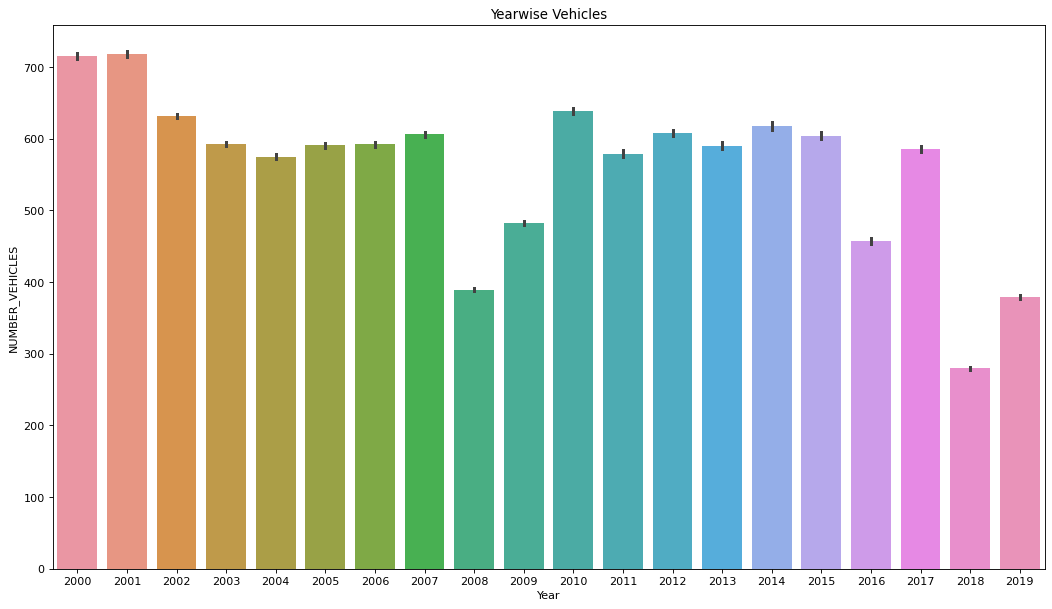

In [26]:
from matplotlib.pyplot import figure

figure(figsize=(16, 9), dpi=80)
sns.barplot(x = 'Year',y='NUMBER_VEHICLES',data = traffic_data)

plt.title('Yearwise Vehicles')

Text(0.5, 1.0, 'Road Intersection Distribution')

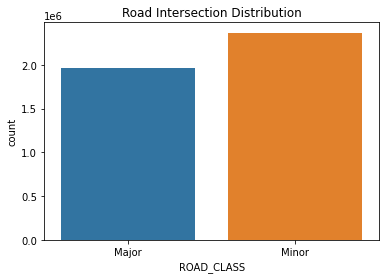

In [28]:

sns.countplot(x='ROAD_CLASS', data=traffic_data)
plt.title('Road Intersection Distribution')

In [31]:
def make_hist(junction='Major'):
    data = traffic_data[traffic_data['ROAD_CLASS'] == junction]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data['NUMBER_VEHICLES'], kde=True, stat='probability', color = 'indianred')
    ax.set_title(f'Plot show the distribution of data in junction {junction}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()
    

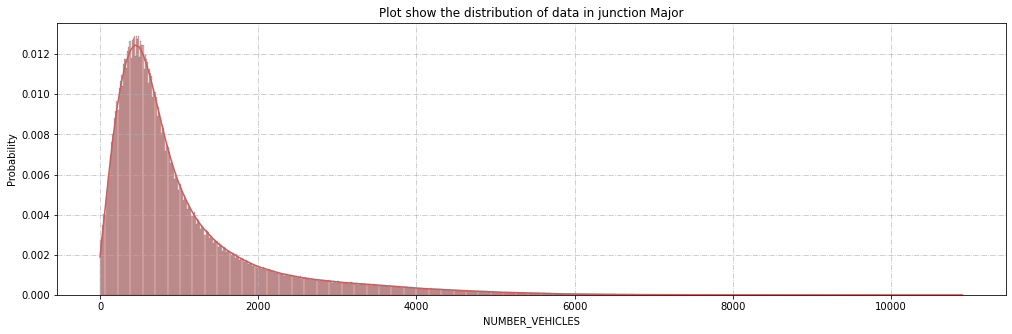

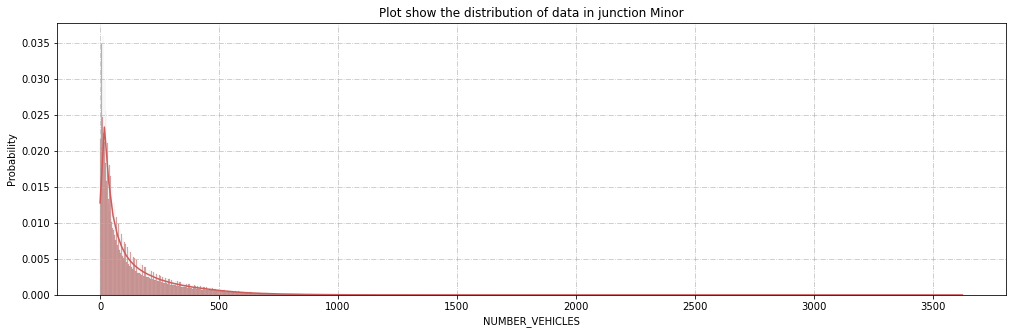

In [32]:
make_hist(junction = 'Major')
make_hist(junction = 'Minor')

In [36]:
def make_time_series_plot(junction='Major'):
    f, ax = plt.subplots(figsize=(20, 9))
    data=traffic_data[traffic_data.ROAD_CLASS == junction]
    ax = sns.lineplot(data=data, y='NUMBER_VEHICLES', x='TIMESTAMP', ax=ax)
    start = data.head(1)
    end = data.tail(1)
    ax.set_title(f'Time series plot for the junction {junction}')
    ax.grid(True, ls='-.')
    plt.show()

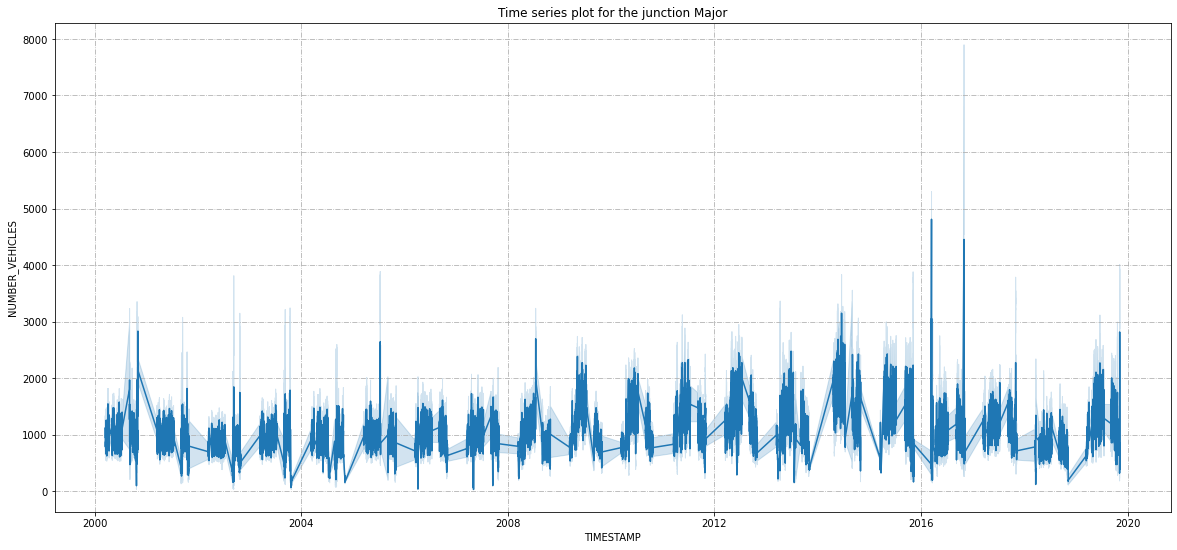

In [37]:
make_time_series_plot(junction='Major')

In [ ]:
make_time_series_plot(junction='Minor')

### Forecasting with the Simple Moving Average 

In [59]:
traffic_data2 = traffic_data

In [60]:
traffic_data.head()

,Unnamed: 0,ROAD_ID,TIMESTAMP,ROAD_CLASS,NUMBER_VEHICLES,Year,Month,Day
2019-09-06 17:00:00,0,A3112-52-E-1.1,2019-09-06 17:00:00,Major,25.0,2019,9,6
2019-09-06 12:00:00,1,A3112-52-E-1.1,2019-09-06 12:00:00,Major,37.0,2019,9,6
2019-09-06 14:00:00,2,A3112-52-E-1.1,2019-09-06 14:00:00,Major,27.0,2019,9,6
2019-09-06 14:00:00,3,A3112-52-W-1.1,2019-09-06 14:00:00,Major,33.0,2019,9,6
2019-09-06 12:00:00,4,A3112-52-W-1.1,2019-09-06 12:00:00,Major,29.0,2019,9,6


In [61]:
traffic_data = traffic_data.set_index(pd.DatetimeIndex(traffic_data['TIMESTAMP'].values))

In [62]:
traffic_data.head()

,Unnamed: 0,ROAD_ID,TIMESTAMP,ROAD_CLASS,NUMBER_VEHICLES,Year,Month,Day
2019-09-06 17:00:00,0,A3112-52-E-1.1,2019-09-06 17:00:00,Major,25.0,2019,9,6
2019-09-06 12:00:00,1,A3112-52-E-1.1,2019-09-06 12:00:00,Major,37.0,2019,9,6
2019-09-06 14:00:00,2,A3112-52-E-1.1,2019-09-06 14:00:00,Major,27.0,2019,9,6
2019-09-06 14:00:00,3,A3112-52-W-1.1,2019-09-06 14:00:00,Major,33.0,2019,9,6
2019-09-06 12:00:00,4,A3112-52-W-1.1,2019-09-06 12:00:00,Major,29.0,2019,9,6


In [76]:
dfmodel =  traffic_data2[((traffic_data2['ROAD_CLASS'] == 'Major') & 
                          (traffic_data2['ROAD_ID'] == 'A1(M)-16061-N-92.11'))]
dfmodel.shape

(48, 8)

In [64]:
traffic_data_final = dfmodel['NUMBER_VEHICLES']

In [65]:
traffic_data_final.head()

2019-05-22 08:00:00    2759.0
2019-05-22 07:00:00    3288.0
2019-05-22 11:00:00    2002.0
2019-05-22 14:00:00    2288.0
2019-05-22 15:00:00    2657.0
Name: NUMBER_VEHICLES, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


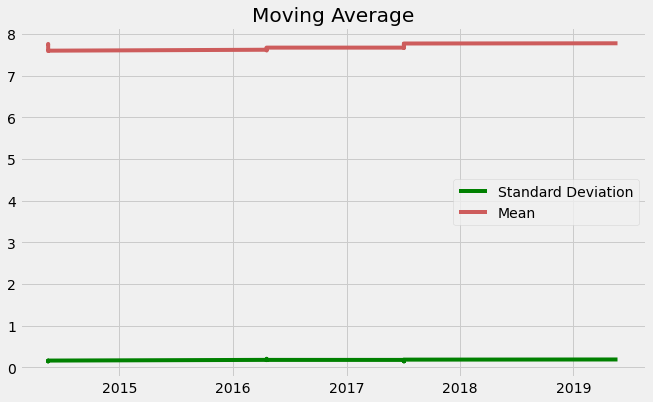

In [78]:
df_log = np.log(traffic_data_final)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import math
rcParams['figure.figsize'] = 10, 6
#df_log = np.log(traffic_data_final)
#moving_avg = df_log.rolling(12).mean()
#std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="green", label = "Standard Deviation")
plt.plot(moving_avg, color="indianred", label = "Mean")
plt.legend()
plt.show()

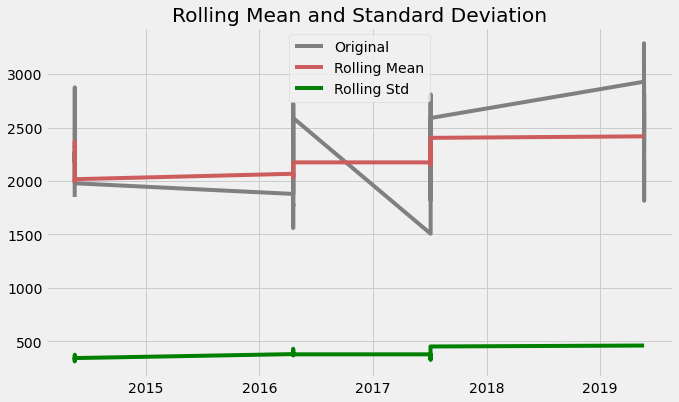

Results of dickey fuller test
Test Statistics                -4.890867
p-value                         0.000036
No. of lags used                0.000000
Number of observations used    47.000000
critical value (1%)            -3.577848
critical value (5%)            -2.925338
critical value (10%)           -2.600774
dtype: float64


In [67]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='grey',label='Original')
    plt.plot(rolmean, color='indianred', label='Rolling Mean')
    plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
    
test_stationarity(traffic_data_final)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


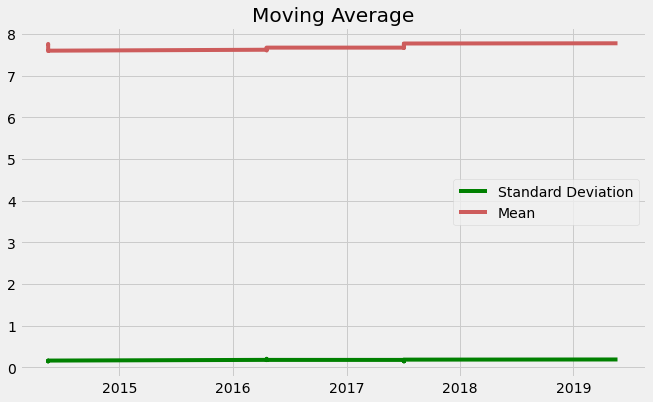

In [68]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(traffic_data_final)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="green", label = "Standard Deviation")
plt.plot(moving_avg, color="indianred", label = "Mean")
plt.legend()
plt.show()

### ARIMA Model

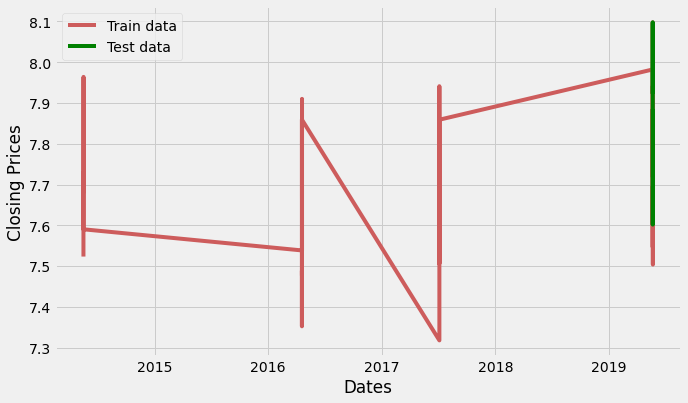

In [69]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[:-int(len(df_log)*0.9)]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Vehicle Count')
plt.plot(df_log, 'indianred', label='Train data')
plt.plot(test_data, 'green', label='Test data')
plt.legend()

In [70]:
# pip install pmdarima

from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima


In [74]:
traffic_arima_model = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(traffic_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10.174, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13.588, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17.504, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12.141, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec


/Users/lipikapatil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/lipikapatil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/lipikapatil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/lipikapatil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-19.490, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-15.546, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.477 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  11.745
Date:                Wed, 19 Oct 2022   AIC                            -19.490
Time:                        22:06:54   BIC                            -16.162
Sample:                             0   HQIC                           -18.296
                                 - 40                                      

/Users/lipikapatil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/lipikapatil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/lipikapatil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/lipikapatil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/lipikapatil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in recipr